<a href="https://colab.research.google.com/github/RJaqE/Challenge2/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [43]:
#importamos pandas y warning ignore
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [44]:
#leemos archivo .csv desde url
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [45]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [46]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [47]:
#Comprobación de incoherencias en los datos
#datos nulos
datos.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [48]:
#normalizamos
from pandas import json_normalize

# Normalizar columnas problemáticas
customer_info = json_normalize(datos['customer'])
phone_info = json_normalize(datos['phone'])
internet_info = json_normalize(datos['internet'])
account_info = json_normalize(datos['account'])


# Unir todo con el dataframe original (sin esas columnas anidadas)
datos_limpios = pd.concat([datos.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_info.add_prefix("cust_"),
                            phone_info.add_prefix("phone_"),
                            internet_info.add_prefix("internet_"),
                            account_info.add_prefix("account_")],
                           axis=1)

datos_limpios.head()

,customerID,Churn,cust_gender,cust_SeniorCitizen,cust_Partner,cust_Dependents,cust_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [49]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   cust_gender                7267 non-null   object 
 3   cust_SeniorCitizen         7267 non-null   int64  
 4   cust_Partner               7267 non-null   object 
 5   cust_Dependents            7267 non-null   object 
 6   cust_tenure                7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [50]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

datos_limpios = pd.concat([datos[['customerID','Churn']],df_customer, df_phone, df_internet, df_account], axis=1)
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

##Manejo de inconsistencias

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.


In [51]:
columnas_numericas = [
    'Churn', 'gender', 'SeniorCitizen','Partner', 'Dependents',
    'PhoneService','InternetService', 'MultipleLines', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PaymentMethod', 'Contract','OnlineSecurity']

In [52]:
#verificamos unique()
for columna in columnas_numericas:
    print(f"{columna}: {datos_limpios[columna].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
InternetService: ['DSL' 'Fiber optic' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Contract: ['One year' 'Month-to-month' 'Two year']
OnlineSecurity: ['No' 'Yes' 'No internet service']


In [53]:
import numpy as np

datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].str.replace(' ', '', regex=True)
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].replace('', np.nan)
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].astype(float)
datos_limpios['Charges.Total'].isnull().sum()

datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].fillna(0)
datos_limpios['Charges.Total'].isnull().sum()

datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [54]:
datos_limpios = datos_limpios.query("Churn != ''")
datos_limpios = datos_limpios
datos_limpios['Churn'].unique()

datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(lambda col: col.str.lower())
datos_limpios.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003-mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month-to-month,No,mailed check,59.9,542.40
2,0004-tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.9,280.85
3,0011-igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.0,1237.85
4,0013-exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.9,267.40


In [55]:
datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))
datos_limpios['Contract'] = datos_limpios['Contract'].apply(lambda x: x.replace('-',' '))
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month to month,No,mailed check,59.9,542.40
2,0004tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month to month,Yes,electronic check,73.9,280.85
3,0011igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month to month,Yes,electronic check,98.0,1237.85
4,0013exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month to month,Yes,mailed check,83.9,267.40


In [56]:
datos_limpios['gender'] = datos_limpios['gender'].map({'male': 0, 'female': 1})
datos_limpios['InternetService'] = datos_limpios['InternetService'].map({'no': 0, 'dsl': 1, 'fiber optic': 2})
datos_limpios['Contract'] = datos_limpios['Contract'].map({'month to month': 0, 'one year': 1, 'two year': 2})

columnas_binarias = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

datos_limpios[columnas_binarias] = datos_limpios[columnas_binarias].replace({'Yes':1, 'No':0})

In [57]:
mapeo_servicios = {
    'No': 0,
    'Yes': 1,
    'No internet service': 0,
    'No phone service': 0
}
columnas_servicios = ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','OnlineSecurity']

for columna in columnas_servicios:
    datos_limpios[columna] = datos_limpios[columna].map(mapeo_servicios)


datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,0,1,1,0,1,1,mailed check,65.6,593.30
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,0,1,0,0,mailed check,59.9,542.40
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,0,0,0,0,1,electronic check,73.9,280.85
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,1,0,1,1,0,1,electronic check,98.0,1237.85
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,1,0,0,1,mailed check,83.9,267.40


In [58]:
for columna in columnas_numericas:
    print(f"{columna}: {datos_limpios[columna].unique()}")

Churn: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
InternetService: [1 2 0]
MultipleLines: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: [1 0 2]
OnlineSecurity: [0 1]


In [59]:
map_internet = {
    0: 'No',
    1: 'DSL',
    2: 'Fiber optic'
}
if 'InternetService' in datos_limpios.columns:
    datos_limpios['InternetService'] = datos_limpios['InternetService'].map(map_internet)

# Normalizar Contract
map_contract = {
    0: 'Month-to-month',
    1: 'One year',
    2: 'Two year'
}
if 'Contract' in datos_limpios.columns:
    datos_limpios['Contract'] = datos_limpios['Contract'].map(map_contract)

# Verificar de nuevo
for col in ['InternetService', 'Contract', 'PaymentMethod']:
    print(f"{col}: {datos_limpios[col].unique()}")

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


##Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [60]:
datos_limpios['Cuentas_Diarias'] = datos_limpios['Charges.Monthly'] / 30


datos_limpios.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002orfbo,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,mailed check,65.6,593.30,2.186667
1,0003mknfe,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004tlhlj,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011igkff,1,0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013exchz,1,1,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,mailed check,83.9,267.40,2.796667


##Estandarización y transformación de datos (opcional)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [61]:
datos_limpios = pd.get_dummies(datos_limpios, columns=['PaymentMethod'])
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0002orfbo,0,1,0,1,1,9,1,0,DSL,...,0,One year,1,65.6,593.30,2.186667,False,False,False,True
1,0003mknfe,0,0,0,0,0,9,1,1,DSL,...,1,Month-to-month,0,59.9,542.40,1.996667,False,False,False,True
2,0004tlhlj,1,0,0,0,0,4,1,0,Fiber optic,...,0,Month-to-month,1,73.9,280.85,2.463333,False,False,True,False
3,0011igkff,1,0,1,1,0,13,1,0,Fiber optic,...,1,Month-to-month,1,98.0,1237.85,3.266667,False,False,True,False
4,0013exchz,1,1,1,1,0,3,1,0,Fiber optic,...,0,Month-to-month,1,83.9,267.40,2.796667,False,False,False,True


In [62]:
datos_limpios[['PaymentMethod_mailed check',
    'PaymentMethod_bank transfer (automatic)',
      'PaymentMethod_credit card (automatic)',
      'PaymentMethod_electronic check']].sum()

,0
PaymentMethod_mailed check,1612
PaymentMethod_bank transfer (automatic),1544
PaymentMethod_credit card (automatic),1522
PaymentMethod_electronic check,2365


In [63]:
datos_limpios.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   object 
 10  OnlineSecurity                           7043 non-nul

In [64]:
servicios = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'OnlineBackup', 'DeviceProtection', 'PhoneService', 'MultipleLines']


datos_limpios['ServiciosContratados'] = datos_limpios[servicios].sum(axis=1)
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0002orfbo,0,1,0,1,1,9,1,0,DSL,...,One year,1,65.6,593.30,2.186667,False,False,False,True,4
1,0003mknfe,0,0,0,0,0,9,1,1,DSL,...,Month-to-month,0,59.9,542.40,1.996667,False,False,False,True,3
2,0004tlhlj,1,0,0,0,0,4,1,0,Fiber optic,...,Month-to-month,1,73.9,280.85,2.463333,False,False,True,False,2
3,0011igkff,1,0,1,1,0,13,1,0,Fiber optic,...,Month-to-month,1,98.0,1237.85,3.266667,False,False,True,False,5
4,0013exchz,1,1,1,1,0,3,1,0,Fiber optic,...,Month-to-month,1,83.9,267.40,2.796667,False,False,False,True,3


#📊 Carga y análisis

##Análisis Descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [65]:
datos_limpios.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,ServiciosContratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723,3.362914
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002,2.062031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333,8.000000


##Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

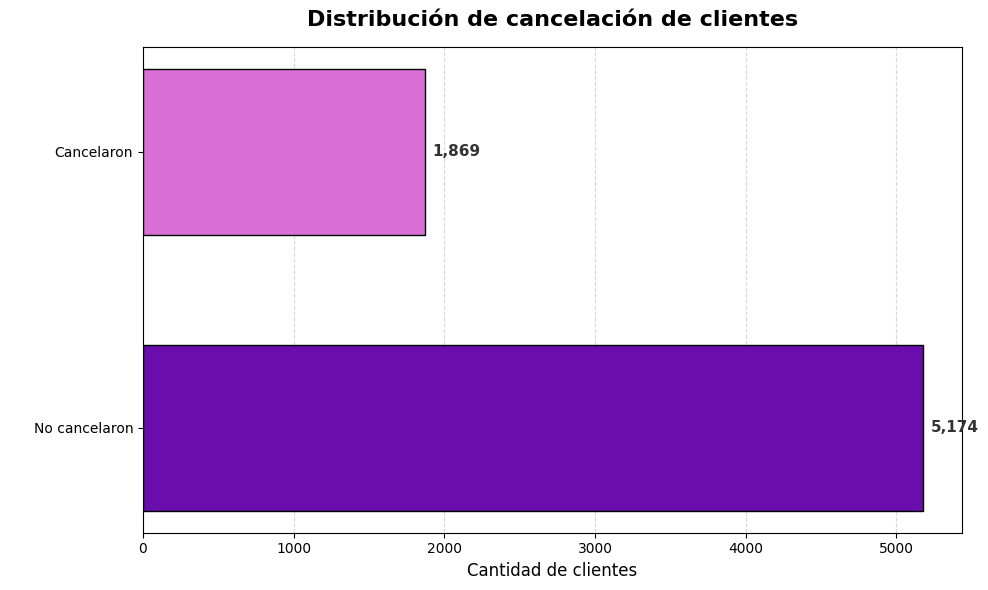

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Conteo de clientes
conteo = datos_limpios['Churn'].value_counts().rename(index={0: 'No cancelaron', 1: 'Cancelaron'})

fig, ax = plt.subplots(figsize=(10,6))

colors = ['#6a0dad', '#da70d6']
bars = ax.barh(conteo.index, conteo, color=colors, edgecolor='black', height=0.6)

ax.set_title('Distribución de cancelación de clientes', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Cantidad de clientes', fontsize=12)
ax.set_ylabel(' ', fontsize=12)

for bar in bars:
    width = bar.get_width()
    ax.text(width + max(conteo)*0.01, bar.get_y() + bar.get_height()/2,
            f'{int(width):,}', va='center', fontsize=11, fontweight='bold', color='#333333')

ax.xaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)


plt.tight_layout()


fig.savefig('distribucion_cancelacion.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()


##Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

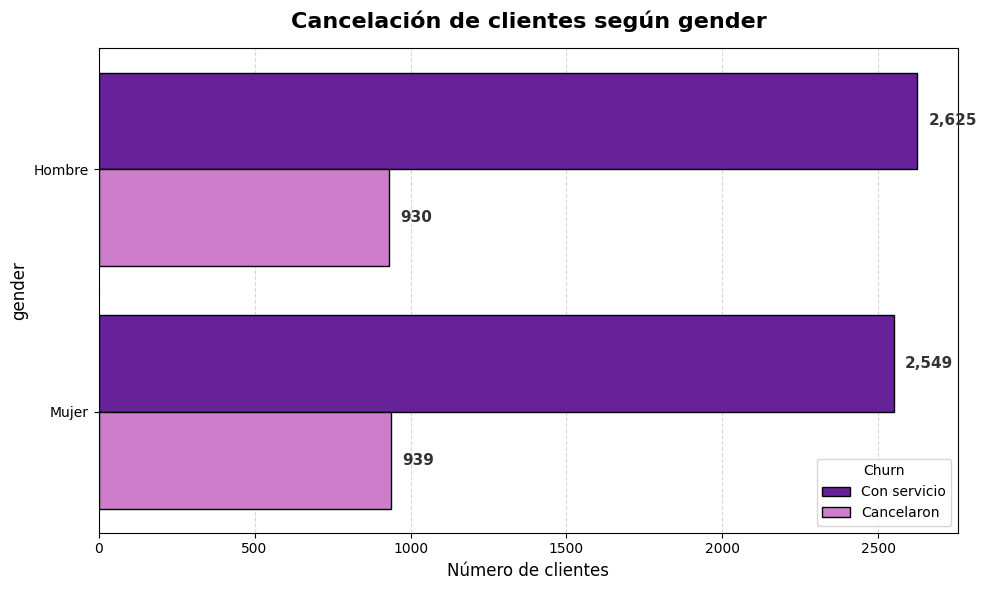


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



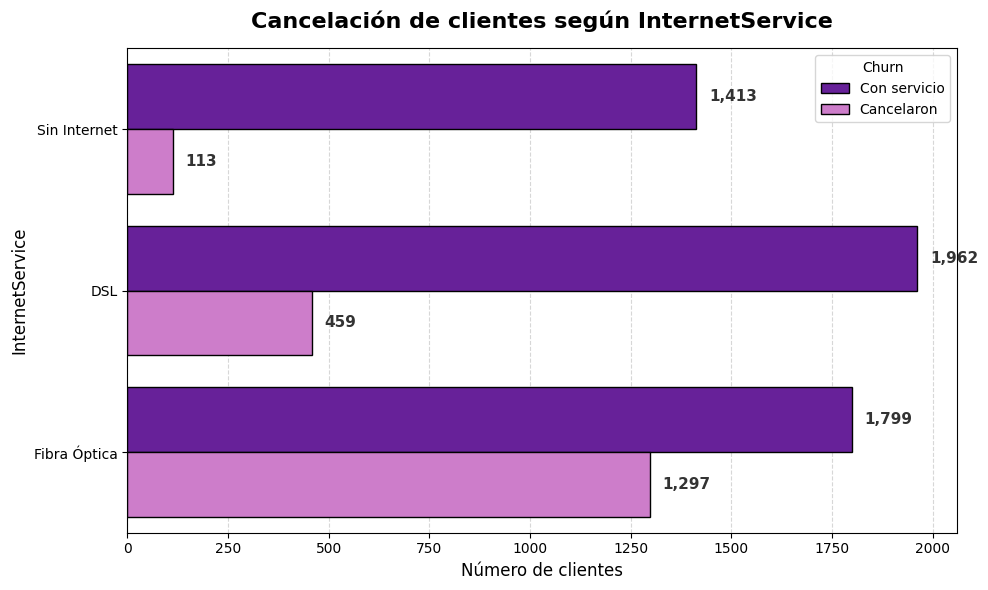


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



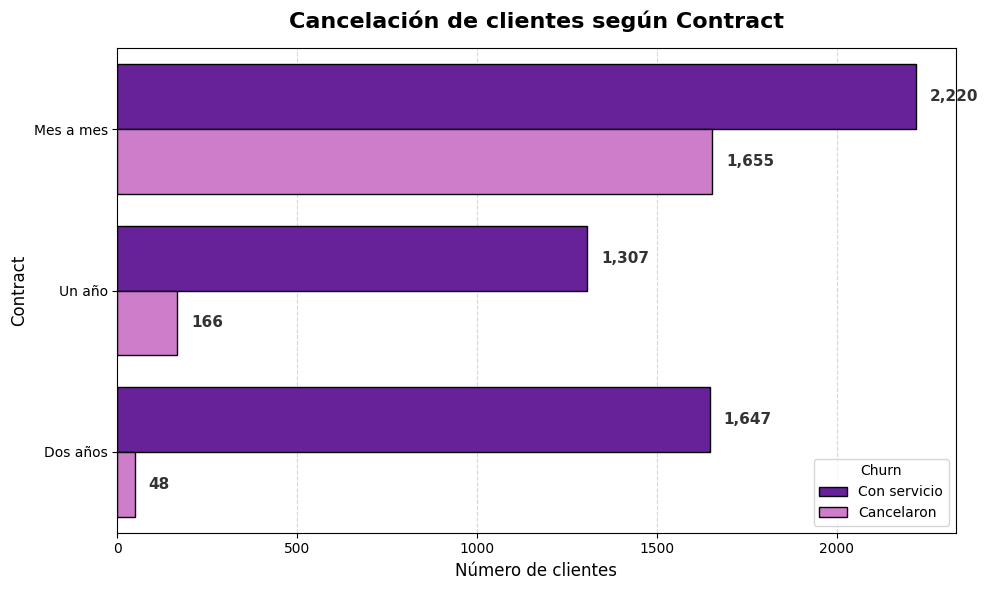


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_churn_by_category(column, labels_dict=None):
    fig, ax = plt.subplots(figsize=(10,6))


    sns.countplot(
        data=datos_limpios,
        y=column,
        hue='Churn',
        ax=ax,
        palette=['#6a0dad', '#da70d6'],
        edgecolor='black'
    )

    # Títulos y etiquetas
    ax.set_title(f'Cancelación de clientes según {column}', fontsize=16, weight='bold', pad=15)
    ax.set_xlabel('Número de clientes', fontsize=12)
    ax.set_ylabel(column, fontsize=12)

    # Leyenda
    ax.legend(title='Churn', labels=['Con servicio', 'Cancelaron'])


    if labels_dict:
        unique_vals = sorted(datos_limpios[column].unique())
        ax.set_yticks(range(len(unique_vals)))
        ax.set_yticklabels([labels_dict[val] for val in unique_vals])


    for a in ax.patches:
        width = a.get_width()
        if width > 0:
            ax.text(width + max(datos_limpios[column].value_counts())*0.01,
                    a.get_y() + a.get_height() / 2,
                    f'{int(width):,}',
                    va='center',
                    fontsize=11,
                    fontweight='bold',
                    color='#333333')


    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)


    plt.tight_layout()


    fig.savefig(f'{column}.png', transparent=False, dpi=300, bbox_inches='tight')

    plt.show()
    print('\n' + '-'*180 + '\n')


map_internet = {'No': 0, 'DSL': 1, 'Fiber optic': 2}
map_contract = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

datos_limpios['InternetService'] = datos_limpios['InternetService'].map(map_internet)
datos_limpios['Contract'] = datos_limpios['Contract'].map(map_contract)



labels_gender = {0: 'Hombre', 1: 'Mujer'}
labels_internet = {0: 'Sin Internet', 1: 'DSL', 2: 'Fibra Óptica'}
labels_contract = {0: 'Mes a mes', 1: 'Un año', 2: 'Dos años'}

plot_churn_by_category('gender', labels_gender)
plot_churn_by_category('InternetService', labels_internet)
plot_churn_by_category('Contract', labels_contract)

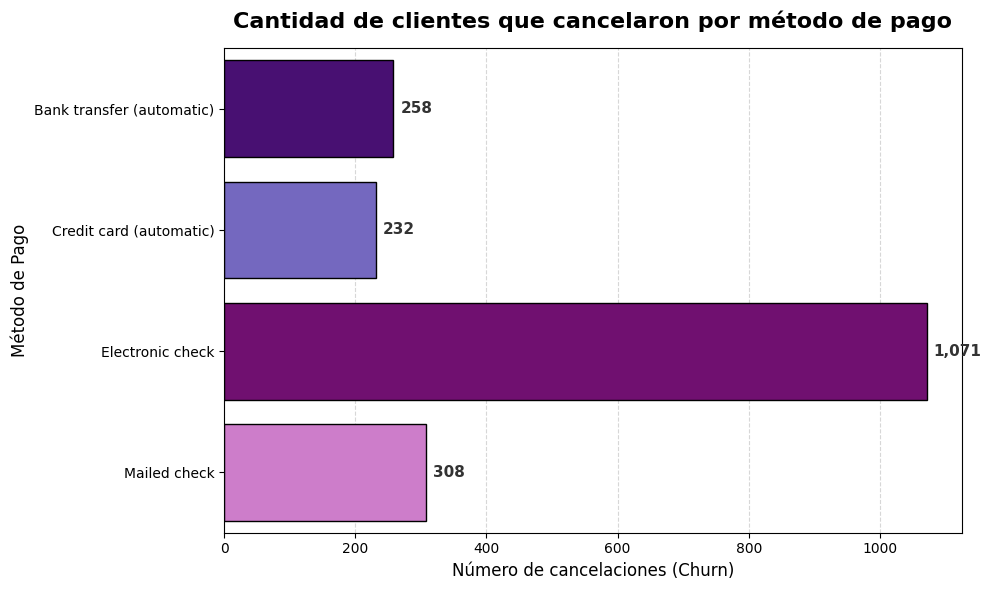

In [69]:
payment_churn = {
    'Bank transfer (automatic)': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_bank transfer (automatic)'].sum(),
    'Credit card (automatic)': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_credit card (automatic)'].sum(),
    'Electronic check': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_electronic check'].sum(),
    'Mailed check': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_mailed check'].sum()
}

df_churn = pd.DataFrame(payment_churn.items(), columns=['Método', 'Cancelaciones'])

# Crear figura
fig, ax = plt.subplots(figsize=(10,6))

# Graficar con seaborn
colors = ['#4b0082', '#6a5acd', '#800080', '#da70d6']  # tonos de púrpura y orchid
bars = sns.barplot(
    x='Cancelaciones',
    y='Método',
    data=df_churn,
    orient='h',
    palette=colors,
    edgecolor='black',
    ax=ax
)

# Título y etiquetas
ax.set_title('Cantidad de clientes que cancelaron por método de pago', fontsize=16, weight='bold', pad=15)
ax.set_xlabel('Número de cancelaciones (Churn)', fontsize=12)
ax.set_ylabel('Método de Pago', fontsize=12)

# Mostrar números al final de cada barra
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + max(df_churn['Cancelaciones'])*0.01,
            bar.get_y() + bar.get_height()/2,
            f'{int(width):,}',
            va='center',
            fontsize=11,
            fontweight='bold',
            color='#333333')

# Cuadrícula ligera
ax.xaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Ajuste de márgenes
plt.tight_layout()

# Guardar figura
fig.savefig('cancelaciones_por_metodo.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

##Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.



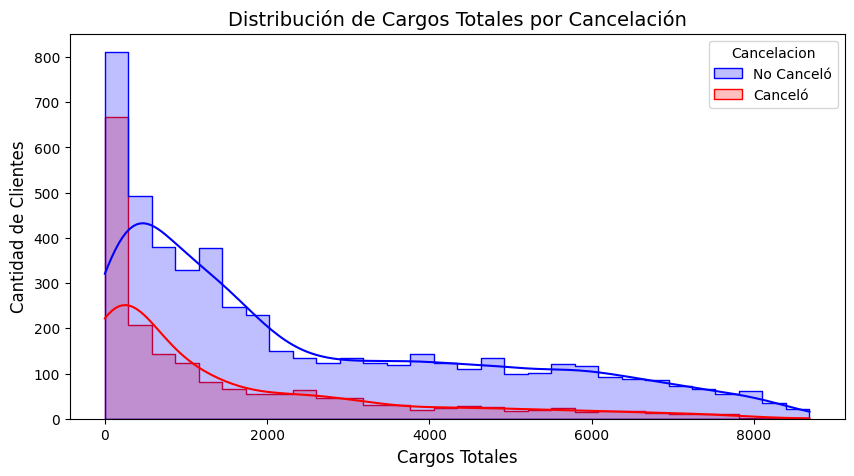

In [70]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='Charges.Total', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de Cargos Totales por Cancelación', fontsize=14)
ax.set_xlabel('Cargos Totales', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_cargos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

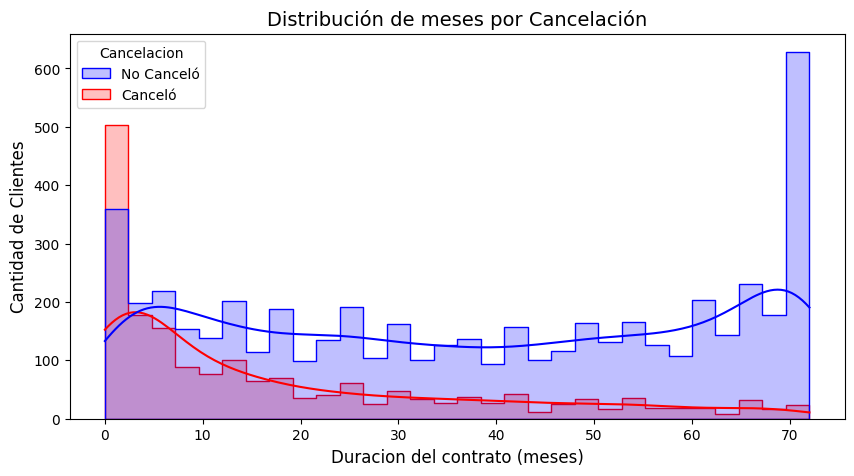

In [71]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='tenure', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución de meses por Cancelación', fontsize=14)
ax.set_xlabel('Duracion del contrato (meses)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_meses.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

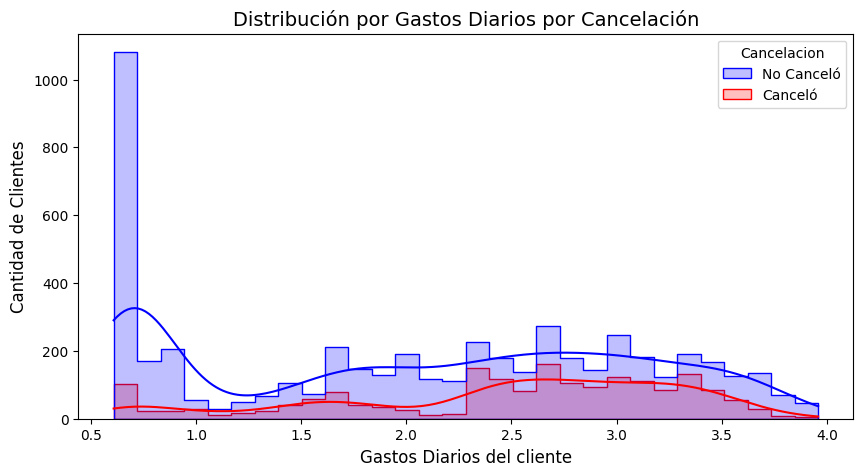

In [72]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='Cuentas_Diarias', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Canceló':'blue', 'Canceló':'red'}, bins=30)

ax.set_title('Distribución por Gastos Diarios por Cancelación', fontsize=14)
ax.set_xlabel('Gastos Diarios del cliente', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_porDias_gastos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

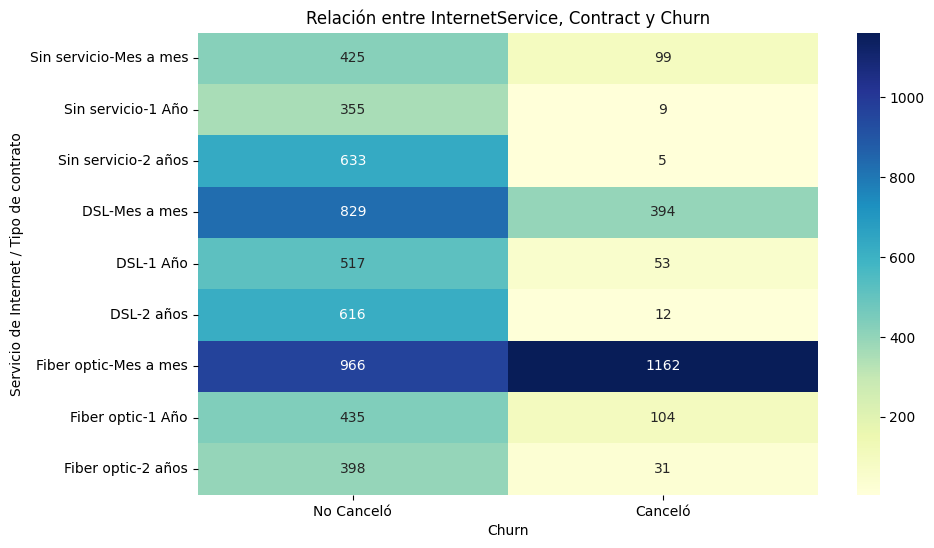

In [73]:
internet_labels = {0: 'Sin servicio', 1: 'DSL', 2: 'Fiber optic'}
contract_labels = {0: 'Mes a mes', 1: '1 Año', 2: '2 años'}
churn_labels = {0:'No Canceló', 1: 'Canceló'}

tabla = pd.crosstab(
    [datos_limpios['InternetService'], datos_limpios['Contract']],
    datos_limpios['Churn']
)

tabla.index = pd.MultiIndex.from_tuples(
    [(internet_labels[i], contract_labels[c]) for i, c in tabla.index],
    names=['InternetService', 'Contract']
)

tabla.rename(columns=churn_labels, inplace=True)

plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre InternetService, Contract y Churn')
plt.ylabel('Servicio de Internet / Tipo de contrato')
plt.xlabel('Churn')
plt.savefig('relacion_internet_contract_churn.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()


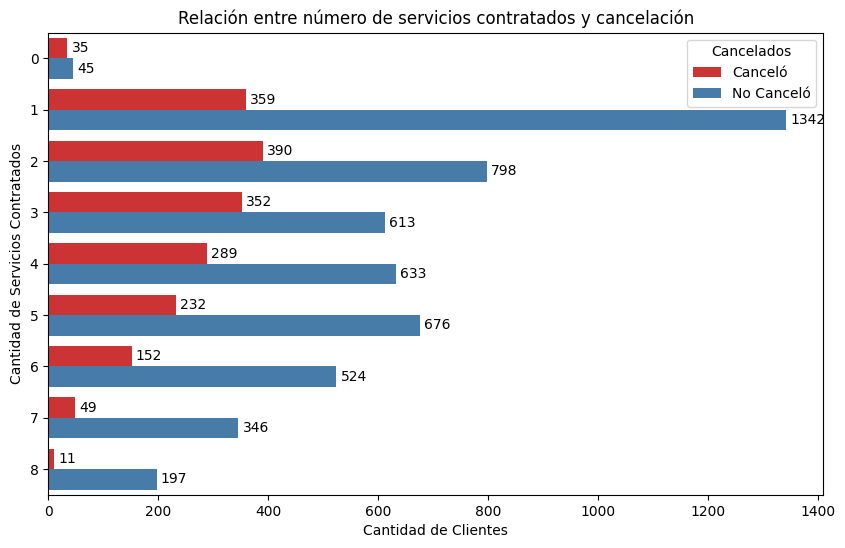

In [74]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=datos_limpios, y='ServiciosContratados', hue='Cancelacion', palette='Set1')

plt.title('Relación entre número de servicios contratados y cancelación')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Cantidad de Servicios Contratados')
plt.legend(title='Cancelados')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)
plt.savefig('servicios_contratados_cancelados.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

**Informe Final – Análisis de Churn en Telecom X**

1. Introducción

Telecom X enfrenta una alta tasa de cancelación de clientes, lo que impacta directamente en sus ingresos y en la estabilidad de la empresa en el mercado.

El presente análisis tiene como objetivo identificar los factores que influyen en la evasión de clientes (Churn) mediante la exploración de los datos históricos.
A través de un proceso estructurado de limpieza, transformación y análisis de datos, se buscan insights que permitan reducir la cancelación y mejorar la retención de clientes.

2. Limpieza y Tratamiento de Datos

Para garantizar la calidad de los datos y facilitar el análisis, se realizaron los siguientes pasos:

Extracción: Se obtuvieron los datos desde la API de Telecom X en formato JSON y se convirtieron en un DataFrame.

Transformación: Se eliminaron inconsistencias, espacios en blanco y se normalizó el texto. Se convirtieron valores categóricos en formato numérico.

Estandarización: Se renombraron columnas y se estructuraron variables binarias (Sí/No → 1/0) para mejorar el procesamiento.



3. Análisis Exploratorio de Datos

El análisis exploratorio permitió comprender el comportamiento de los clientes y sus patrones de cancelación. Se analizaron las siguientes métricas:

Distribución de evasión: Proporción de clientes que cancelaron versus los que permanecieron.

Evasión según características: Impacto del género, tipo de contrato y método de pago en la cancelación.

Tendencias numéricas: Relación entre gastos de los clientes, duración del contrato y tasa de evasión.


Nota: Los gráficos fueron diseñados con colores consistentes y etiquetas visibles para facilitar la interpretación de resultados.

4. Conclusiones e Insights

A partir del análisis realizado, se identificaron hallazgos clave:

Los clientes con contratos mensuales presentan una mayor tendencia a cancelar.

Los usuarios con servicios de Fibra Óptica muestran una menor tasa de cancelación en comparación con DSL.

Los clientes que usan Electronic Check como método de pago presentan una mayor evasión que aquellos que usan tarjeta de crédito o transferencias automáticas.

Estos hallazgos permiten que Telecom X ajuste sus estrategias de retención y focalice sus acciones en los segmentos más críticos.

5. Recomendaciones

Con base en los insights obtenidos, se sugieren las siguientes acciones:

Fidelización de clientes con contratos mensuales: Ofrecer descuentos o beneficios exclusivos para incentivar su permanencia.

Mejorar la experiencia del servicio DSL: Elevar la calidad y satisfacción del servicio para equipararla a Fibra Óptica.

Incentivar métodos de pago más estables: Proporcionar beneficios para clientes que utilicen Electronic Check y fomenten la migración a tarjetas o transferencias automáticas.

Campañas personalizadas de retención: Dirigidas a los segmentos con mayor probabilidad de cancelación, basadas en su perfil y comportamiento.

6. Cierre

El análisis de Churn realizado proporciona información clave para la toma de decisiones estratégicas en Telecom X, permitiendo identificar clientes en riesgo y aplicar medidas efectivas para reducir la evasión, aumentar la retención y mejorar la rentabilidad.